In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/spoty

/content/drive/MyDrive/spoty


In [3]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

np.set_printoptions(precision=2)

In [4]:
#read dataset
data = pd.read_csv("spotify_data.csv", index_col = 'Unnamed: 0')

## EDA


### Data_Summary

In [5]:
#inspecting data_head
data.head(4)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.338,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.807,0.000000,0.0797,0.508,204.961,304293,4


In [6]:
#inspecting data_tail
data.tail(4)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.788,0.000129,0.1300,0.2640,119.897,285067,4
1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.477,0.003130,0.0936,0.0351,100.076,214253,4
1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.431,0.000063,0.1250,0.2020,133.885,239133,3
1473395,Mo' Horizons,Hit the Road Jack (Pé Na Éstrada),4oMiOwhDZEdBuzAfhzRHbi,3,2011,trip-hop,0.782,0.861,1,-7.292,0,0.1250,0.220,0.000008,0.0581,0.8570,89.987,212227,4


In [7]:
#inspecting data_сolumns
data.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [8]:
#inspecting data_types to choose how to clean data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159764 entries, 0 to 1473395
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159764 non-null  object 
 1   track_name        1159764 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  

In [9]:
numeric_cols = ['popularity',
       'year', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

object_cols = ['artist_name', 'track_id', 'track_name', 'genre']

In [10]:
# Total missing values in the DataFrame
data.isnull().sum()

artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [11]:
#searching for duplicates and find none
duplicate_rows = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 19)


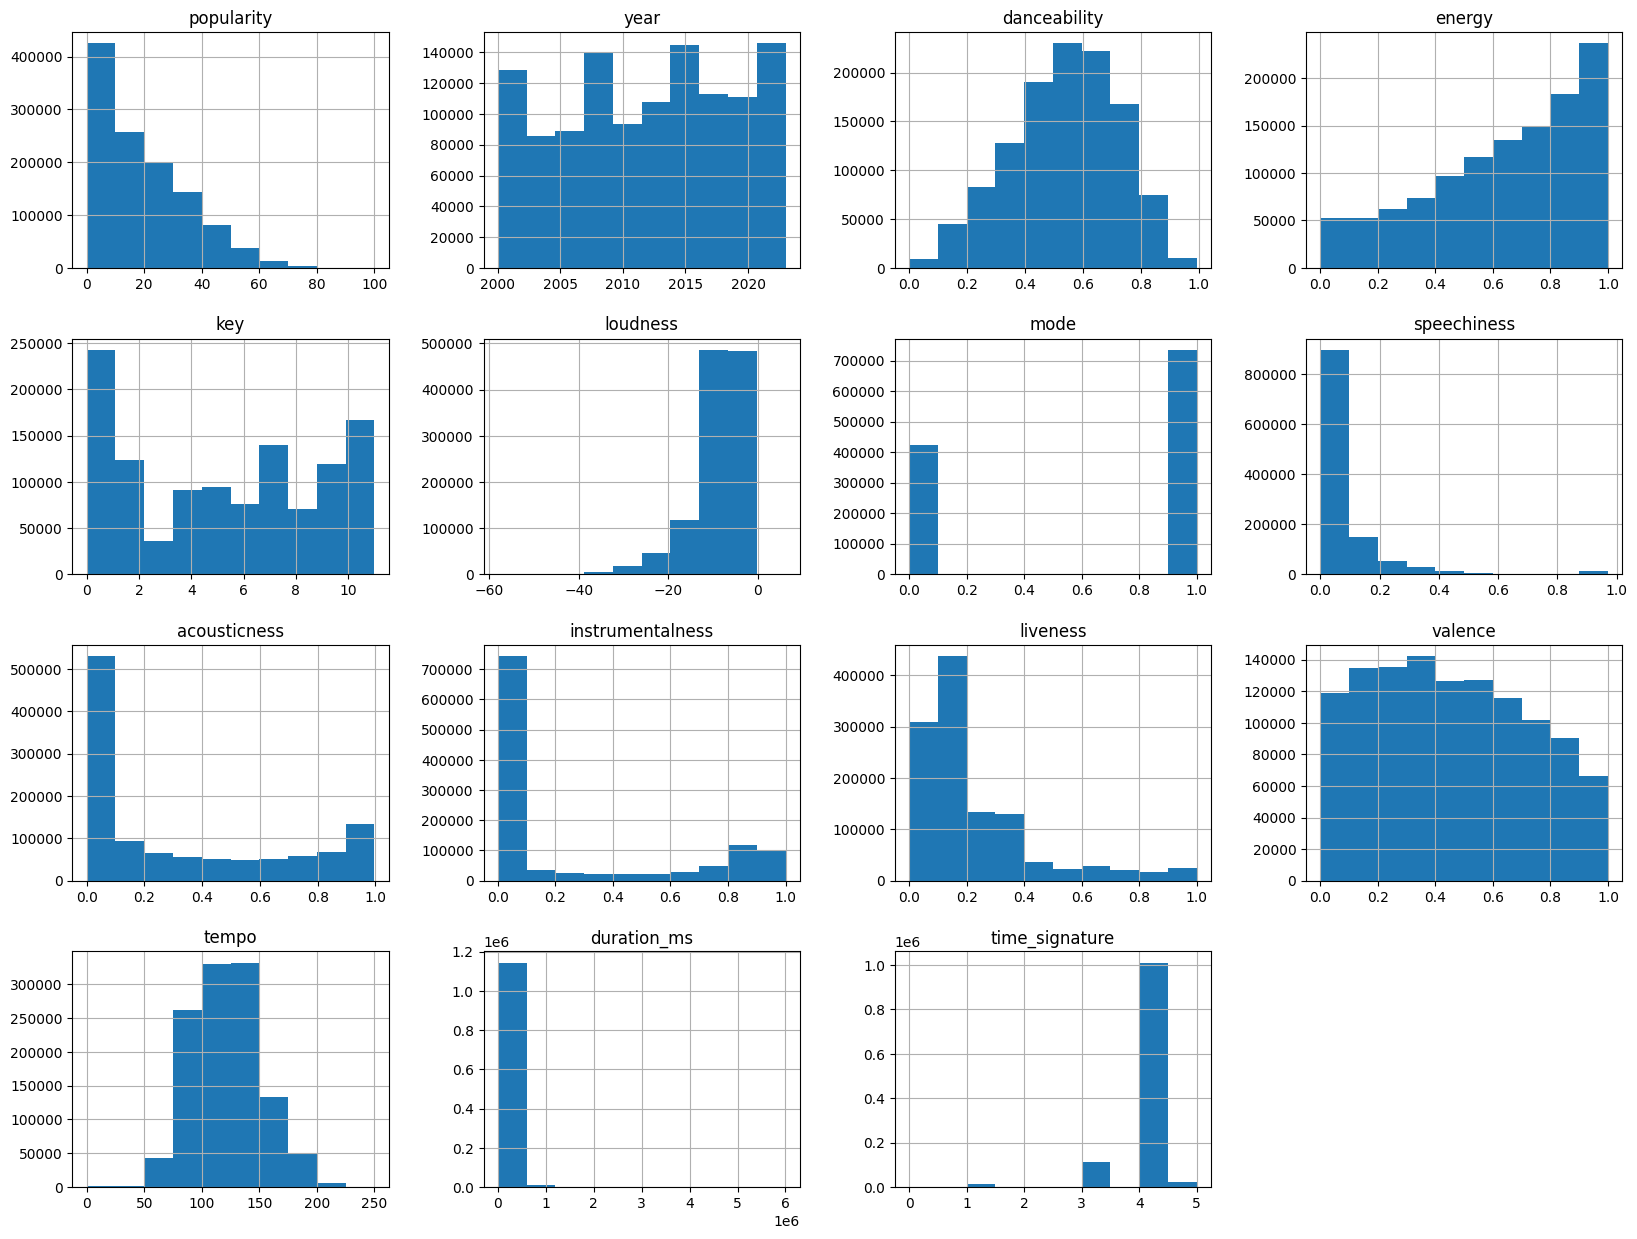

In [12]:
#distribution of data
data.hist(figsize=(20, 15));

## Popularity

In [13]:
data["popularity"].describe()

count    1.159764e+06
mean     1.838312e+01
std      1.588554e+01
min      0.000000e+00
25%      5.000000e+00
50%      1.500000e+01
75%      2.900000e+01
max      1.000000e+02
Name: popularity, dtype: float64

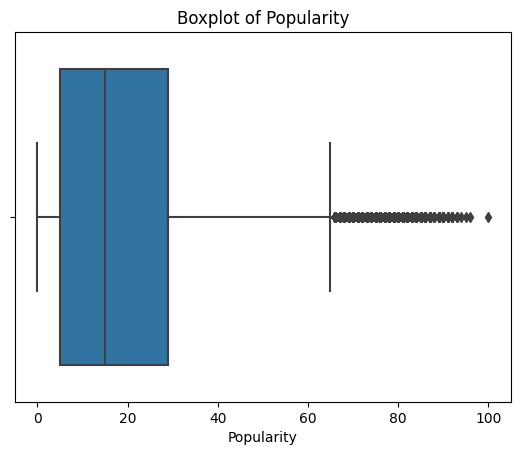

In [14]:
#popularity distribution
sns.boxplot(x=data['popularity'])
plt.xlabel('Popularity')
plt.title('Boxplot of Popularity');

In [15]:
q1 = np.percentile(data['popularity'], 25)
q2 = np.percentile(data['popularity'], 50)
q3 = np.percentile(data['popularity'], 75)
iqr = q3 - q1
print(f'''The mean is {q2}
The 25% quartile is {q1}
The 75% quartile is {q3}''')

The mean is 15.0
The 25% quartile is 5.0
The 75% quartile is 29.0


In [16]:
std_dev = np.std(data["popularity"])
rounded = round(std_dev,2)

print(f'''The standard deviation is {rounded}''')

The standard deviation is 15.89


In [17]:
out_of_frame = data[(data.popularity < q1) | (data.popularity > q3)]
number_of_outliers = len(out_of_frame)
print(f"Number of outliers: {number_of_outliers}")

Number of outliers: 561571


## Sorting by popularity

In [30]:
# Top 10 tracks
data.sort_values(by="popularity", ascending=False).head(10)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
612503,Miley Cyrus,Flowers,0yLdNVWF3Srea0uzk55zFn,100,2023,pop,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,0.0322,0.646,117.999,200455,4
605178,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",4nrPB8O7Y7wsOCJdgXkthe,96,2023,hip-hop,0.778,0.632,2,-5.600,0,0.0493,0.27400,0.000000,0.0915,0.498,122.104,218289,4
612504,The Weeknd,Die For You - Remix,7oDd86yk8itslrA9HRP2ki,95,2023,pop,0.531,0.525,1,-6.500,0,0.0671,0.23200,0.000000,0.4410,0.502,66.900,232857,4
569184,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,94,2022,pop,0.644,0.735,8,-5.747,1,0.0391,0.05210,0.144000,0.1610,0.418,88.980,153947,4
569195,Manuel Turizo,La Bachata,5ww2BF9slyYgNOk37BlC4u,93,2022,pop,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,162638,4
541577,David Guetta,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,93,2022,dance,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,4
569191,Rema,Calm Down (with Selena Gomez),0WtM2NBVQNNJLh6scP13H8,93,2022,pop,0.801,0.806,11,-5.206,1,0.0381,0.38200,0.000669,0.1140,0.802,106.999,239318,4
608232,NewJeans,OMG,65FftemJ1DbbZ45DUfHJXE,92,2023,k-pop,0.804,0.771,9,-4.067,0,0.0433,0.35700,0.000003,0.1080,0.739,126.956,212253,4
560200,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",2tTmW7RDtMQtBk7m2rYeSw,92,2022,hip-hop,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,198938,4
569188,d4vd,Here With Me,78Sw5GDo6AlGwTwanjXbGh,92,2022,pop,0.574,0.469,4,-8.209,1,0.0254,0.53400,0.000092,0.1280,0.288,132.023,242485,4


In [31]:
data.sort_values(by="popularity", ascending=True).head(10)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
148316,The Well Wishers,I Don't Know Why,4wvAxQB5wqumZ49WFNGAXQ,0,2014,power-pop,0.405,0.939,2,-4.047,1,0.0852,0.000965,0.000042,0.1980,0.448,90.562,167099,4
452721,Raven Heretic,Boys Night Out,1IUIhdbx1FaM2PiDiW4Kj4,0,2020,heavy-metal,0.399,0.715,11,-17.832,1,0.0451,0.000117,0.000850,0.1600,0.410,170.062,216875,4
452720,Wolfsinger,Buried Alive,7dUuqyotDfJ9TUEnP2DIde,0,2020,heavy-metal,0.495,0.966,9,-5.337,1,0.1810,0.026300,0.000002,0.1260,0.309,114.999,282839,4
452719,冥尊,悪魔の衝撃 - Remastered,4z1fSfkN58prj62dqytNbD,0,2020,heavy-metal,0.381,0.888,1,-5.700,0,0.0518,0.000218,0.001840,0.3480,0.543,128.145,271499,4
452718,NECK CEMETERY,King of the Dead,0qRBe9mpl6yK2AqOLiEBBd,0,2020,heavy-metal,0.514,0.942,2,-9.606,1,0.0722,0.000045,0.001240,0.3680,0.218,76.992,278280,4
452717,JURASSIC JADE,はじめてのLove Song,4CAjYVK3yTqU8D82uDPmcp,0,2020,heavy-metal,0.583,0.992,2,-2.420,1,0.0593,0.000252,0.065000,0.0544,0.178,105.087,223040,4
452715,Зеркальный лабиринт,Ночь зла,5zczZ7bSqJ76p0aFckbEot,0,2020,heavy-metal,0.480,0.947,3,-5.918,1,0.1040,0.000160,0.004540,0.2020,0.131,119.941,290000,4
452714,Hellraiders,Raiders' Rage - Instrumental,4Q3ATBpy8B2gHOS6FAaYmb,0,2020,heavy-metal,0.408,0.967,9,-7.186,1,0.0784,0.000045,0.534000,0.1470,0.391,149.972,162670,4
452712,Age of Rage,Between the Hammer and the Anvil,2HV4ENrl7MhuCUfDkbS43D,0,2020,heavy-metal,0.427,0.938,1,-3.589,1,0.0531,0.000394,0.000227,0.2880,0.485,200.038,216000,4
452709,VRAIN,Heaven And Hell,4YgIAXGs0vlOSCiyMZsQeR,0,2020,heavy-metal,0.369,0.881,2,-5.028,1,0.0691,0.000005,0.783000,0.2360,0.586,170.033,125443,4


In [32]:
#Popularity logical indexation
ranges = [(50, 60), (60, 70), (70, 80), (80,90), (90,100)]
for start, end in ranges:
    filtered_data = data[(data["popularity"] >= start) & (data["popularity"] < end)]
    print(f"Range {start}-{end}:")
    print(len(filtered_data))

Range 50-60:
37040
Range 60-70:
12504
Range 70-80:
2947
Range 80-90:
471
Range 90-100:
27


In [33]:
# Filter the DataFrame based on the condition "popularity" > 90 ()
columns_to_show = ["artist_name", "track_name", "popularity", "genre", "year"]
filtered_data = data[data["popularity"] > 90]
result_df = filtered_data.sort_values(by="popularity", ascending=False)
print(result_df)

            artist_name                                         track_name  \
612503      Miley Cyrus                                            Flowers   
605178         Bizarrap              Shakira: Bzrp Music Sessions, Vol. 53   
612504       The Weeknd                                Die For You - Remix   
569184              SZA                                          Kill Bill   
541577     David Guetta                                    I'm Good (Blue)   
569195    Manuel Turizo                                         La Bachata   
569191             Rema                      Calm Down (with Selena Gomez)   
608232         NewJeans                                                OMG   
569190        Sam Smith                          Unholy (feat. Kim Petras)   
569188             d4vd                                       Here With Me   
569187     Taylor Swift                                          Anti-Hero   
560200         Bizarrap              Quevedo: Bzrp Music Session

In [34]:

# Apply the aggregation functions to the filtered data (popularity > 90) for the selected columns (numeric)

columns_to_show = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "duration_ms", "tempo"]
filtered_data = data[data["popularity"] > 90]
result_df = filtered_data[columns_to_show].agg([np.mean, np.std, np.min, np.max])
print(result_df)




      danceability    energy  loudness  speechiness  acousticness  \
mean      0.675353  0.669588 -5.821588     0.050006      0.225496   
std       0.112454  0.145153  1.548014     0.020817      0.229322   
amin      0.464000  0.417000 -9.345000     0.025400      0.003830   
amax      0.835000  0.965000 -3.549000     0.097200      0.777000   

      instrumentalness  liveness    duration_ms       tempo  
mean          0.011818  0.178276  193766.117647  116.705765  
std           0.035298  0.111211   30202.340567   26.033018  
amin          0.000000  0.032200  148486.000000   66.900000  
amax          0.144000  0.441000  242485.000000  167.968000  


# #the table above shows main statistical parametrs for numeric columns

## Graphics for parametrs with normal distribution

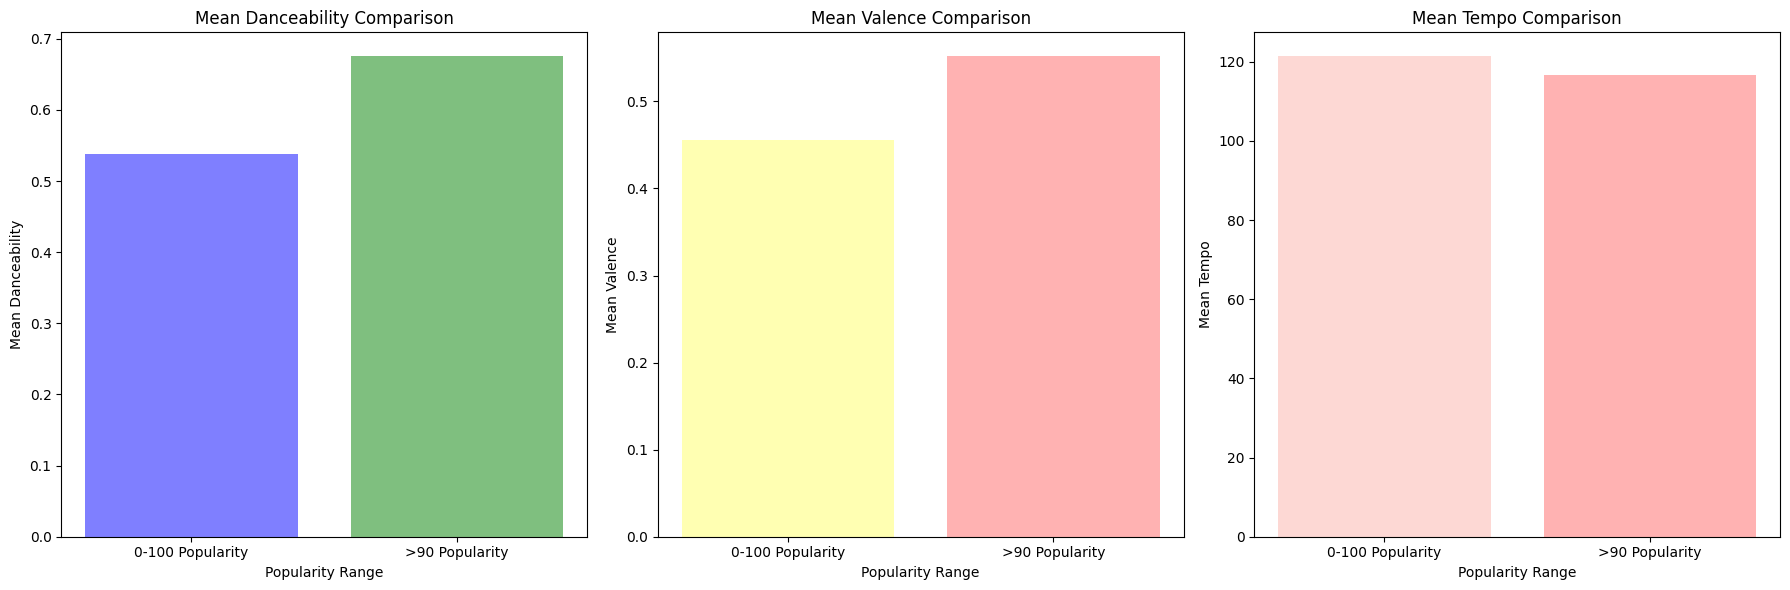

In [35]:


fig, axes = plt.subplots(1, 3, figsize=(18, 6))


# Danceability
column_to_show = "danceability"
filtered_data_high_popularity = data[data["popularity"] > 90]
mean_high_popularity = filtered_data_high_popularity[column_to_show].mean()
mean_all_popularity = data[column_to_show].mean()
labels = ["0-100 Popularity", ">90 Popularity"]
mean_values = [mean_all_popularity, mean_high_popularity]
axes[0].bar(labels, mean_values, color=['blue', 'green'], alpha=0.5)
axes[0].set_xlabel('Popularity Range')
axes[0].set_ylabel(f'Mean {column_to_show.capitalize()}')
axes[0].set_title(f'Mean {column_to_show.capitalize()} Comparison')

# Valence
column_to_show = "valence"
filtered_data_high_popularity = data[data["popularity"] > 90]
mean_high_popularity = filtered_data_high_popularity[column_to_show].mean()
mean_all_popularity = data[column_to_show].mean()
labels = ["0-100 Popularity", ">90 Popularity"]
mean_values = [mean_all_popularity, mean_high_popularity]
axes[1].bar(labels, mean_values, color=['yellow', 'red'], alpha=0.3)
axes[1].set_xlabel('Popularity Range')
axes[1].set_ylabel(f'Mean {column_to_show.capitalize()}')
axes[1].set_title(f'Mean {column_to_show.capitalize()} Comparison')

# Tempo
column_to_show = "tempo"
filtered_data_high_popularity = data[data["popularity"] > 90]
mean_high_popularity = filtered_data_high_popularity[column_to_show].mean()
mean_all_popularity = data[column_to_show].mean()
labels = ["0-100 Popularity", ">90 Popularity"]
mean_values = [mean_all_popularity, mean_high_popularity]
axes[2].bar(labels, mean_values, color=['salmon', 'red'], alpha=0.3)
axes[2].set_xlabel('Popularity Range')
axes[2].set_ylabel(f'Mean {column_to_show.capitalize()}')
axes[2].set_title(f'Mean {column_to_show.capitalize()} Comparison')

plt.tight_layout()

plt.show()


In [36]:
#Graphics for parametrs with skewed and multimodal distribution

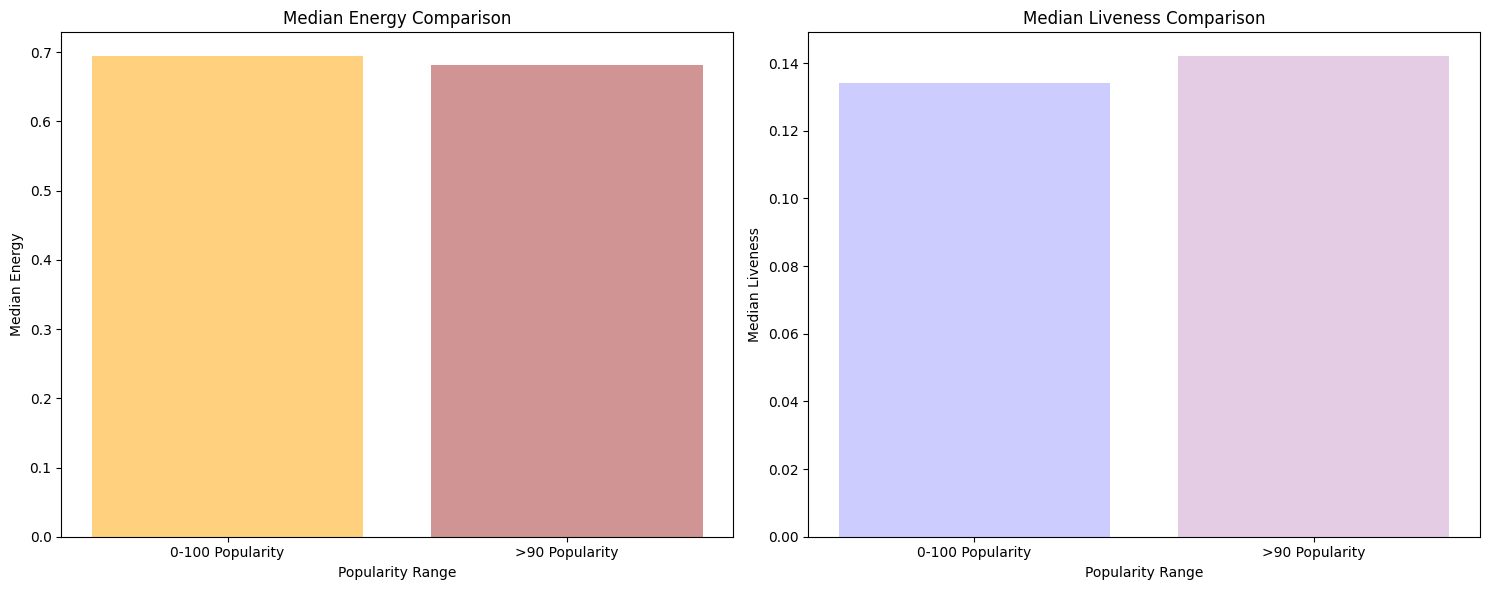

In [37]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Energy
column_to_show = "energy"
filtered_data_high_popularity = data[data["popularity"] > 90]
median_high_popularity = filtered_data_high_popularity[column_to_show].median()
median_all_popularity = data[column_to_show].median()
labels = ["0-100 Popularity", ">90 Popularity"]
median_values = [median_all_popularity, median_high_popularity]
axes[0].bar(labels, median_values, color=['orange', 'brown'], alpha=0.5)
axes[0].set_xlabel('Popularity Range')
axes[0].set_ylabel(f'Median {column_to_show.capitalize()}')
axes[0].set_title(f'Median {column_to_show.capitalize()} Comparison')

# Liveness
column_to_show = "liveness"
filtered_data_high_popularity = data[data["popularity"] > 90]
median_high_popularity = filtered_data_high_popularity[column_to_show].median()
median_all_popularity = data[column_to_show].median()
labels = ["0-100 Popularity", ">90 Popularity"]
median_values = [median_all_popularity, median_high_popularity]
axes[1].bar(labels, median_values, color=['blue', 'purple'], alpha=0.2)
axes[1].set_xlabel('Popularity Range')
axes[1].set_ylabel(f'Median {column_to_show.capitalize()}')
axes[1].set_title(f'Median {column_to_show.capitalize()} Comparison')

plt.tight_layout()


plt.show()


#not sure about this as cross tab for the categorical type

In [38]:
cross_tab = pd.crosstab(data["popularity"], data["year"])
cross_table_sorted = cross_tab.sort_values(by='popularity', ascending=False)
top_27_values = cross_table_sorted.head(10)
print(top_27_values)

year        2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  ...  \
popularity                                                              ...   
100            0     0     0     0     0     0     0     0     0     0  ...   
96             0     0     0     0     0     0     0     0     0     0  ...   
95             0     0     0     0     0     0     0     0     0     0  ...   
94             0     0     0     0     0     0     0     0     0     0  ...   
93             0     0     0     0     0     0     0     0     0     0  ...   
92             0     0     0     0     0     0     0     0     0     0  ...   
91             0     0     0     0     0     0     0     0     0     0  ...   
90             0     0     0     0     1     0     0     0     0     0  ...   
89             0     0     0     0     0     0     0     0     0     0  ...   
88             0     0     0     0     0     0     0     0     0     0  ...   

year        2014  2015  2016  2017  2018  2019  202

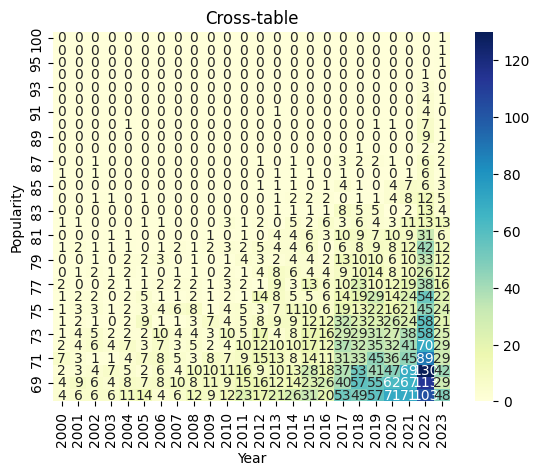

In [39]:
top_30 = cross_table_sorted.head(30)
sns.heatmap(top_30, annot=True, cmap="YlGnBu", fmt="d")


plt.title("Сross-table")
plt.xlabel("Year")
plt.ylabel("Popularity")

plt.show()


Duration

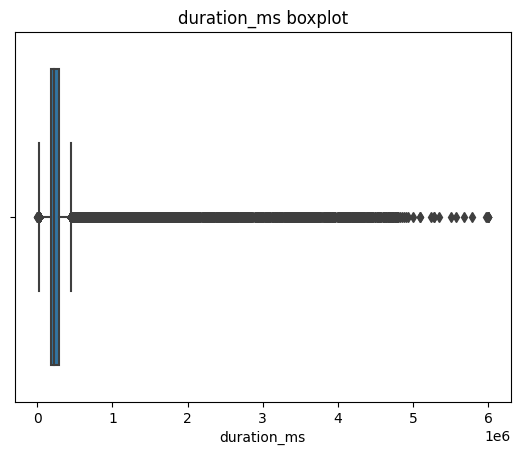

In [40]:
sns.boxplot(x=data['duration_ms'])
plt.xlabel('duration_ms')
plt.title('duration_ms boxplot')
plt.show()

In [41]:
#converting in min
(data['duration_ms']/60000).apply(lambda x: round(x,2))
data['minutes'] = pd.to_timedelta(data['duration_ms'],unit="ms").dt.components.minutes
data['seconds'] = pd.to_timedelta(data['duration_ms'],unit="ms").dt.seconds
data.head(3)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,minutes,seconds
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,...,0.0429,0.694,0.000000,0.1150,0.139,133.406,240166,3,4,240
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,...,0.0258,0.477,0.000014,0.0974,0.515,140.182,216387,4,3,216
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,...,0.0323,0.338,0.000050,0.0895,0.145,139.832,158960,4,2,158


<ipython-input-42-781de887a872>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_15_longest_avg = data.groupby(['genre']).mean()['minutes'].sort_values(ascending=True)[:15]
<ipython-input-42-781de887a872>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_15_longest_avg_rev = data.groupby(['genre']).mean()['minutes'].sort_values(ascending=False)[:15]


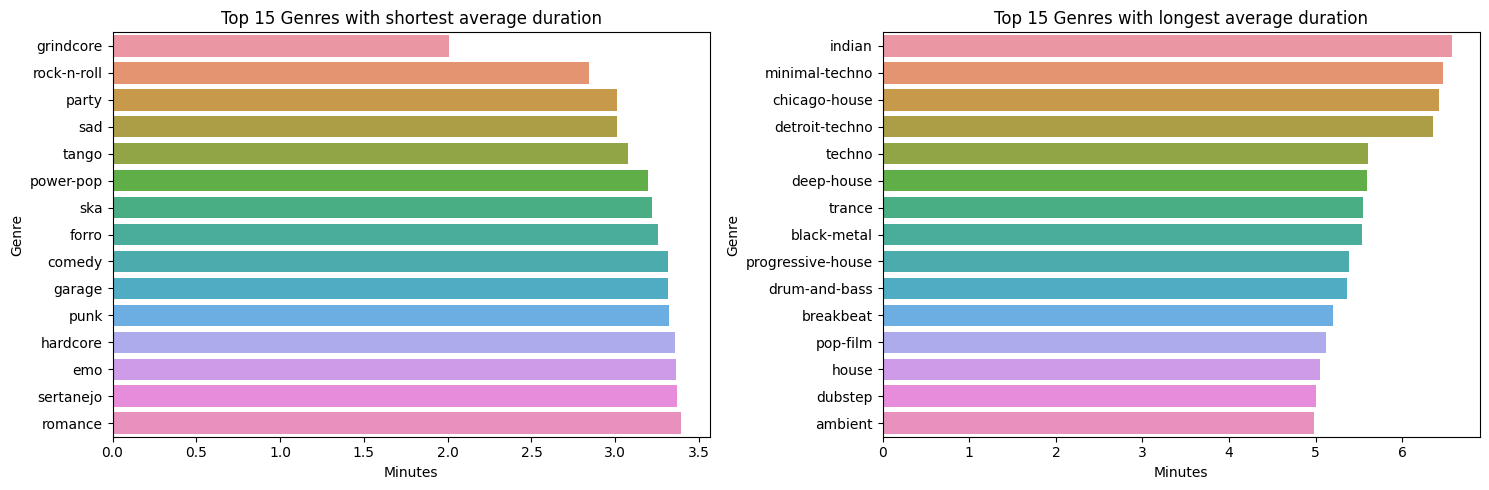

In [42]:
# in minutes
data['minutes'] = data['duration_ms'] / 60000

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#Top with average longest duration
top_15_longest_avg = data.groupby(['genre']).mean()['minutes'].sort_values(ascending=True)[:15]
sns.barplot(y=top_15_longest_avg.index, x=top_15_longest_avg.values, orient='h', ax=axes[0])
axes[0].set_xlabel('Minutes')
axes[0].set_ylabel('Genre')
axes[0].set_title('Top 15 Genres with shortest average duration')

# Shortest duration
top_15_longest_avg_rev = data.groupby(['genre']).mean()['minutes'].sort_values(ascending=False)[:15]
sns.barplot(y=top_15_longest_avg_rev.index, x=top_15_longest_avg_rev.values, orient='h', ax=axes[1])
axes[1].set_xlabel('Minutes')
axes[1].set_ylabel('Genre')
axes[1].set_title('Top 15 Genres with longest average duration')


plt.tight_layout();

plt.show();



## genre

In [43]:
#how many genres we have
genre = set(data.genre.array)
len(set(data.genre.array))

82

In [44]:
data['genre'].value_counts()

black-metal       21852
gospel            21621
ambient           21389
acoustic          21097
alt-rock          20918
                  ...  
chicago-house      5170
dubstep            4774
detroit-techno     3920
rock               3319
songwriter          589
Name: genre, Length: 82, dtype: int64

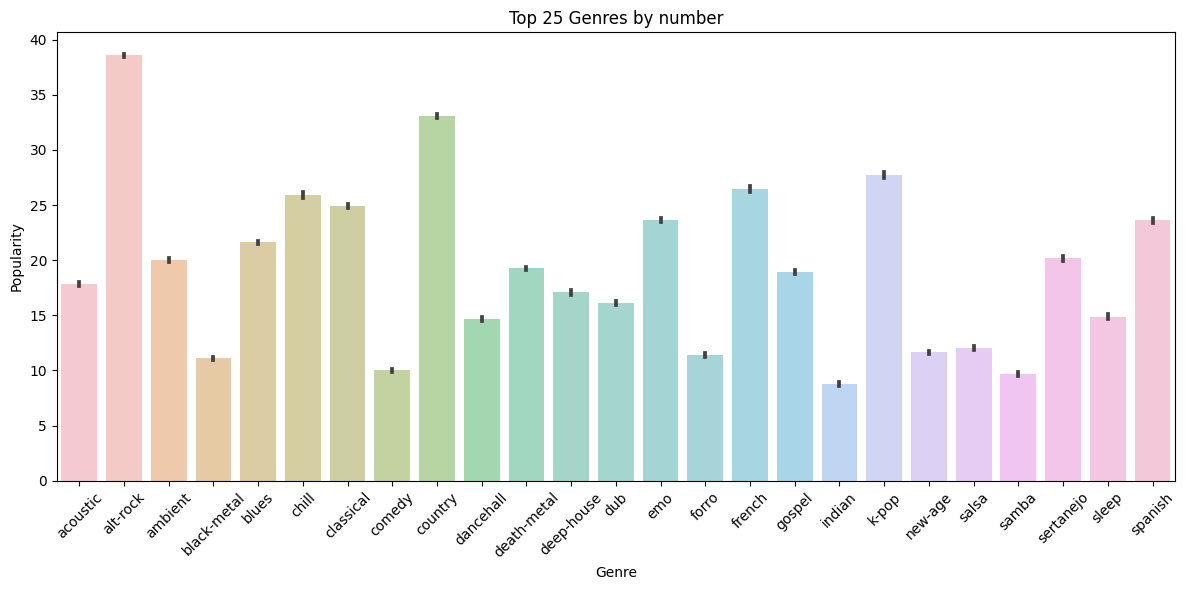

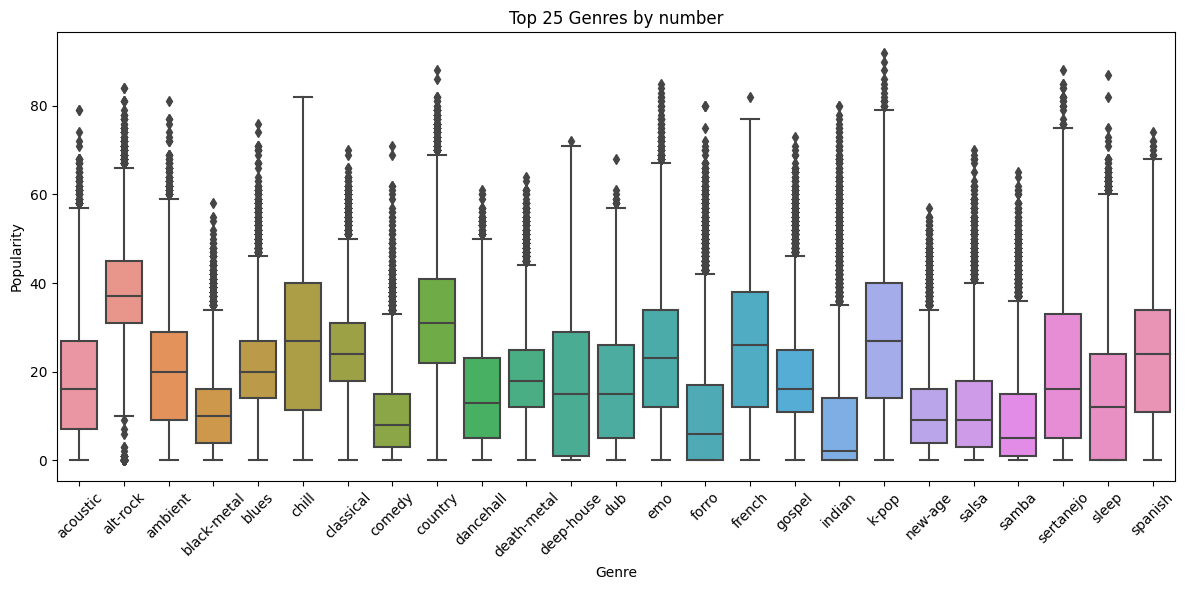

In [45]:
# 25 genres with the highest number of tracks
top_25_genres = data["genre"].value_counts().nlargest(25).index
data_top_25_genres = data[data["genre"].isin(top_25_genres)]

# Bar plot: Genre vs. Popularity
plt.figure(figsize=(12, 6))
sns.barplot(data=data_top_25_genres, x="genre", y="popularity", alpha=0.5)
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.title("Top 25 Genres by number")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box plot: Genre vs. Popularity
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_top_25_genres, x="genre", y="popularity")
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.title("Top 25 Genres by number")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
#Genres with popularity >80
b=data[data["popularity"]>80].genre.value_counts()
print(b)



pop          122
hip-hop       61
dance         57
sad           18
indie-pop     17
k-pop         13
sertanejo     11
rock           9
emo            7
country        7
funk           6
electro        6
alt-rock       5
folk           4
metal          3
chill          3
house          3
edm            3
garage         3
sleep          2
club           1
ambient        1
french         1
hardstyle      1
piano          1
german         1
Name: genre, dtype: int64


In [47]:
b=data[data["popularity"]>80].genre.value_counts()
print(b)

pop          122
hip-hop       61
dance         57
sad           18
indie-pop     17
k-pop         13
sertanejo     11
rock           9
emo            7
country        7
funk           6
electro        6
alt-rock       5
folk           4
metal          3
chill          3
house          3
edm            3
garage         3
sleep          2
club           1
ambient        1
french         1
hardstyle      1
piano          1
german         1
Name: genre, dtype: int64


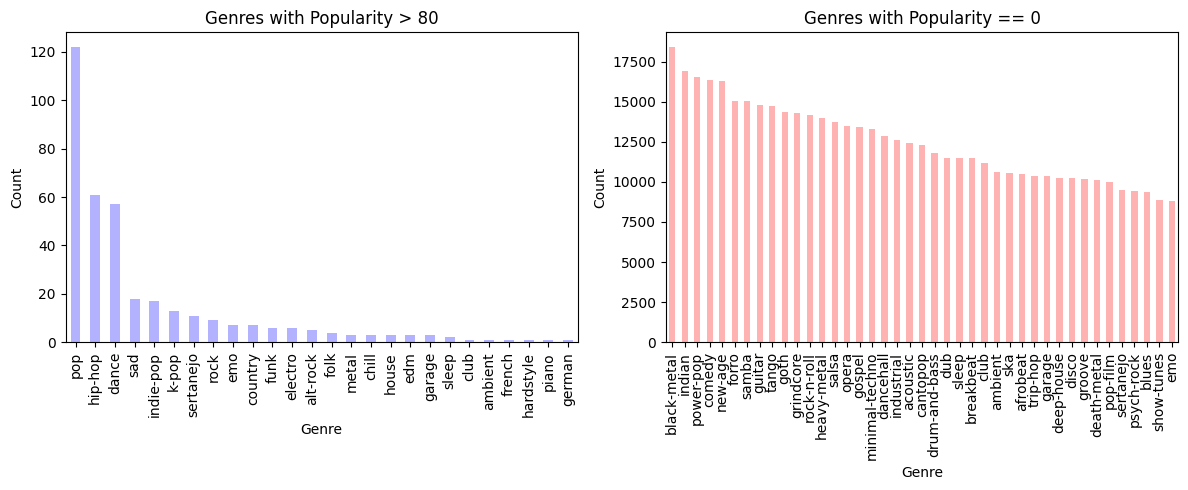

In [48]:

b = data[data["popularity"] > 80]['genre'].value_counts()
c = data[data["popularity"] < 20]['genre'].value_counts()
c_filtered = c[c > 8500]


plt.figure(figsize=(12, 5))

# Genres with Popularity > 80
plt.subplot(1, 2, 1)
b.plot(kind='bar', color='blue',alpha=0.3)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genres with Popularity > 80')

# Genres with Popularity < 20
plt.subplot(1, 2, 2)
c_filtered.plot(kind="bar", color="red", alpha=0.3)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genres with Popularity == 0')

plt.tight_layout()

plt.show()


##Correlation matrix

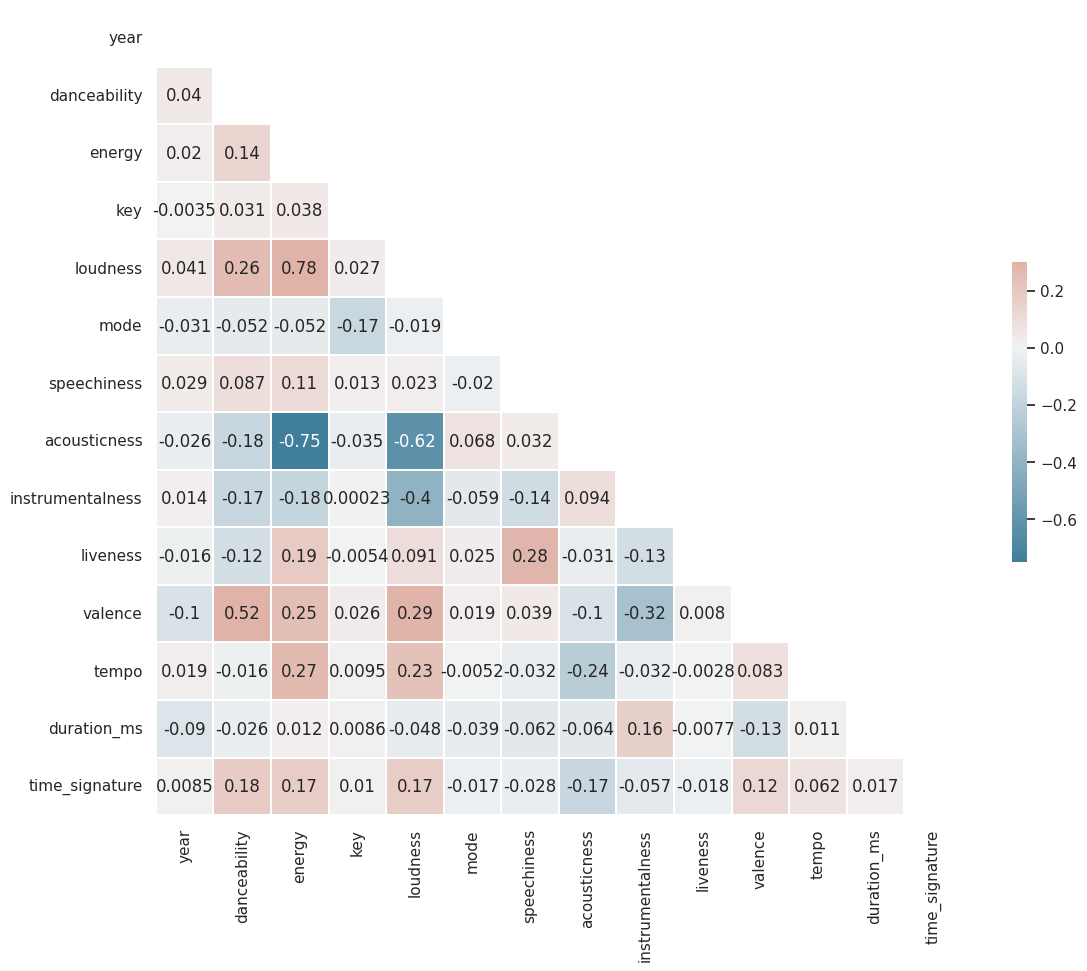

In [50]:
sns.set_theme(style="white")

corr = data[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(13, 13))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .3}, annot = True)
plt.show()

## ML part

In [19]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [20]:
Y_test = data['popularity'][data['year'] > 2021]
Y_train = data['popularity'][data['year'] <= 2021]

In [21]:
X_test =data[data['year']>2021].drop('popularity', axis='columns')
X_train =data[data['year']<=2021].drop('popularity', axis='columns')

### Base line

In [22]:
numeric_cols = [ 'year',
                'danceability',
                'energy',
                'key',
                'loudness',
                'mode',
                'speechiness',
                'acousticness',
                'instrumentalness',
                'liveness',
                'valence',
                'tempo',
                'duration_ms',
                'time_signature']

In [23]:
data.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [24]:
# tss = TimeSeriesSplit(n_splits = 12)
# for train_index, test_index in tss.split(X):
#     X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [25]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.33, random_state=42)

In [26]:
reg = LinearRegression().fit(x_train[numeric_cols], y_train)

In [51]:
mse(y_val, reg.predict(x_val[numeric_cols]), squared=False)

14.114031918755416

In [52]:
reg_tree = RandomForestRegressor(max_depth=7, random_state=42)
reg_tree.fit(x_train[numeric_cols], y_train)

RandomForestRegressor(max_depth=7, random_state=42)

In [53]:
mse(y_val, reg_tree.predict(x_val[numeric_cols]), squared=False)

13.604757861477644

In [54]:
mse(Y_test, reg_tree.predict(X_test[numeric_cols]), squared=False)

17.5731345235079

#Error loss with regression 14 and error loss with random forest is 17

### Modifications over baseline

Let's see popularity column

<Axes: >

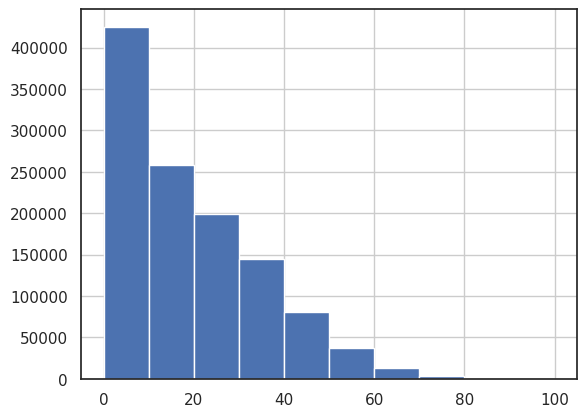

In [55]:
data.popularity.hist()

In [56]:
le = LabelEncoder()
data['genre_encoded'] = le.fit_transform(data['genre'])
data['artist_name_encoded'] = le.fit_transform(data['artist_name'])

In [57]:
numeric_cols_1 = [ 'artist_name_encoded',
                'genre_encoded',
                'danceability',
                'energy',
                'loudness',
                'speechiness',
                'acousticness',
                'instrumentalness',
                'liveness',
                'valence',
                'tempo',
                'duration_ms',
                'time_signature',
                'key',
                 'mode',
                 'year']


In [58]:
data.popularity[data.popularity == 0].shape

(158391,)

In [59]:
data_no_zero = data[data.popularity > 0]
data_zero = data[data.popularity == 0]

<Axes: >

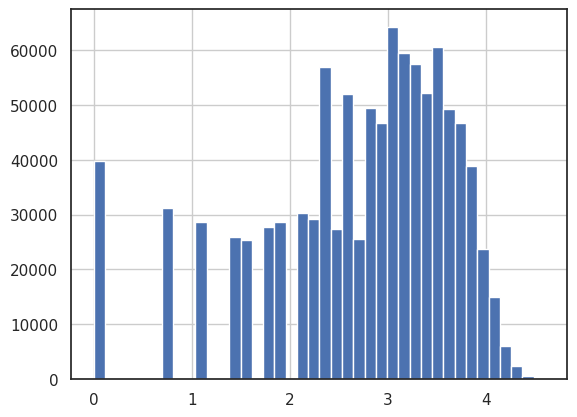

In [60]:
np.log(data_no_zero.popularity).hist(bins=40)

In [61]:
Y_test = np.log(data_no_zero['popularity'][data_no_zero['year'] > 2021])
Y_train = np.log(data_no_zero['popularity'][data_no_zero['year'] <= 2021])


X_test = data_no_zero[data_no_zero['year']>2021].drop('popularity', axis='columns')
X_train = data_no_zero[data_no_zero['year']<=2021].drop('popularity', axis='columns')

In [62]:
scaler = StandardScaler()
X_train[numeric_cols_1] = scaler.fit_transform(X_train[numeric_cols_1])


In [63]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.33, random_state=42)

In [64]:
reg = LinearRegression()
reg.fit(x_train[numeric_cols_1], y_train)

LinearRegression()

In [65]:
np.exp(mse(y_val, reg.predict(x_val[numeric_cols_1]), squared=False))

2.488091003285667

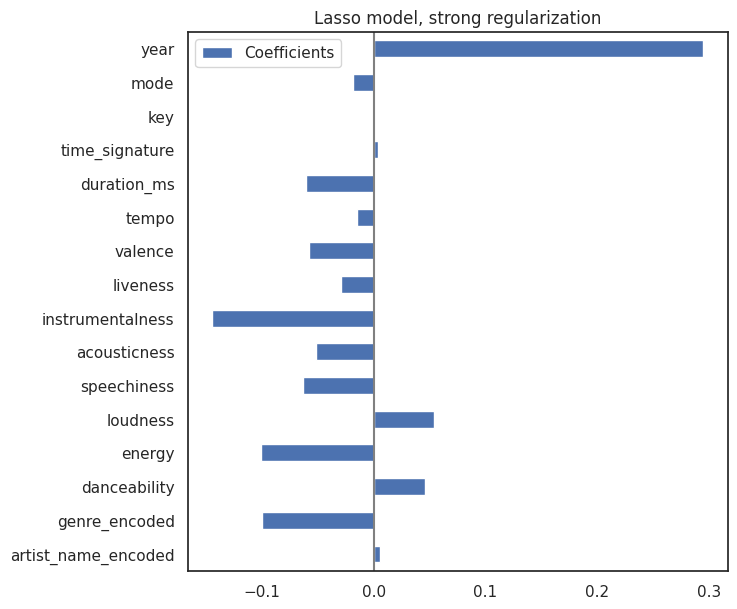

In [66]:
coefs = pd.DataFrame(
    reg.coef_, columns=["Coefficients"], index=x_val[numeric_cols_1].columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Lasso model, strong regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [67]:
#Year, genre, energy and instrumentalness are the main factors (feature importance) for linear regression

In [68]:
reg_tree = RandomForestRegressor(max_depth=11, random_state=42)
reg_tree.fit(x_train[numeric_cols_1], y_train)

RandomForestRegressor(max_depth=11, random_state=42)

In [69]:
np.exp(mse(y_val, reg_tree.predict(x_val[numeric_cols_1]), squared=False))

2.0516533663069683

In [70]:
mse(Y_test, np.exp(reg_tree.predict(X_test[numeric_cols_1])), squared=False)

3.352163807667729

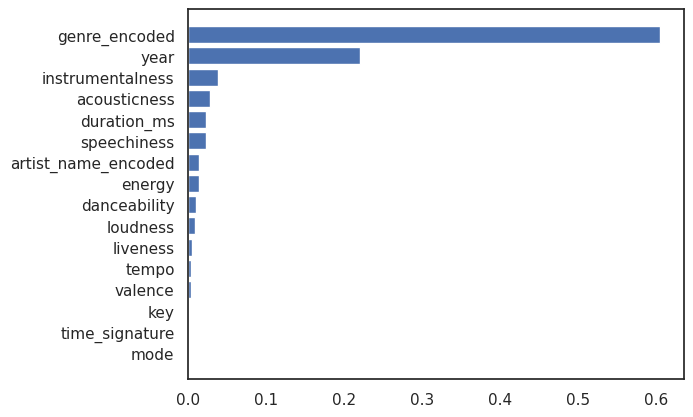

In [71]:
importances = reg_tree.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_val[numeric_cols_1].columns)[indices])

The end.